<a href="https://colab.research.google.com/github/Anaya666/Anaya666/blob/main/Lab02_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪LAB: Polynomial Regression as a First Approximation to Non-Linear Problems

In this lab, you will explore **Polynomial Regression** as a simple and intuitive extension of linear models that allows us to handle **non-linear** relationships between predictors and the target variable. While linear regression assumes a straight-line relationship, polynomial regression allows models to capture curves by introducing **non-linear transformations** of the original features. This a great starting point for thinking about **model complexity** and **non-linearity**, and will also be a first approximation to dealing with non-linear problems. Subsequent labs will concentrate on more advance models for this, such as **support vector machine** and **neural networks**.

---

**Collaboration Note**: This assignment is designed to support collaborative work. We encourage you to divide tasks among group members so that everyone can contribute meaningfully. Many components of the assignment can be approached in parallel or split logically across team members. Good coordination and thoughtful integration of your work will lead to a stronger final result.

---

In total, this lab assignment will be worth **100 points**.

---
**Submission notes**:

* Write down all group members' names, or at least the group name (if you have one and you previously provided it), in the first cell of the notebook.

* Verify that the notebook runs as expected and that all required outputs are included.


https://github.com/nylaup/DS4021-Labs-/tree/main

In [ ]:
#NAME(s) =

## 1. Work with synthetic data (35 points)

### a. Generate the data
    
- Create a random variable `x` with at least 100 samples drawn from a Gaussian distribution (e.g., mean = 0, standard deviation = 1).

- Define a new variable `y` as a non-linear function of this `x`. You can add noise to make the task more realistic.

(*Hint*: Example of a non-linear function: `y = sin(x) + 0.3 * x² + noise`)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
rng = np.random.RandomState(42)
x = rng.normal(0, 1, 100)
y = np.sin(x) + 0.3 * x**2 + rng.normal(0, 1, 100)

- Why do you think it is important to start with a synthetic dataset before using a real one? Elaborate your answer

To ensure the model works properly before it is used on real world data.

### b. Fit and Visualize Polynomial Regression

- First, fit a linear regression model using `LinearRegression` from `sklearn.linear_model`.  
  Plot your predictions over the scatterplot of your original `x` and `y` data.

- Then, apply a polynomial transformation to `x` using `PolynomialFeatures` from `sklearn.preprocessing`.  
  Try increasing the **degree** (e.g., 2, 3, 5, 7) and for each case:
  - Fit a new model on the transformed features.
  - Plot the predictions on top of the data.
  - Evaluate the model using metrics like MSE, MAE, and R².----evaluate on test set - need to do a train test split

**Important**: You should make use of pipelines to combine preprocessing and modeling steps cleanly.

Linear Regression (degree 1 / no poly)
  MSE: 1.0645 | MAE: 0.7947 | R²: 0.1535



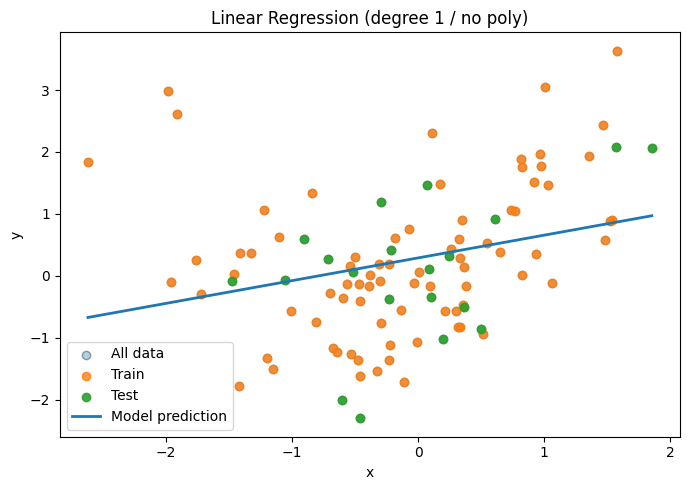

Polynomial Regression (degree 2)
  MSE: 0.8888 | MAE: 0.7646 | R²: 0.2932



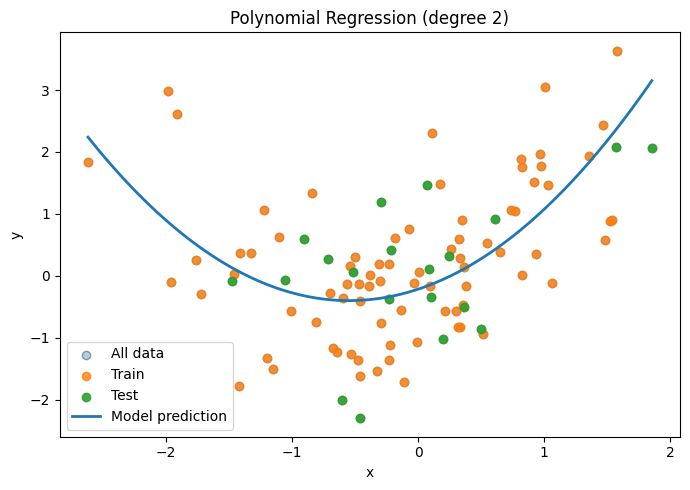

Polynomial Regression (degree 3)
  MSE: 0.8560 | MAE: 0.7367 | R²: 0.3193



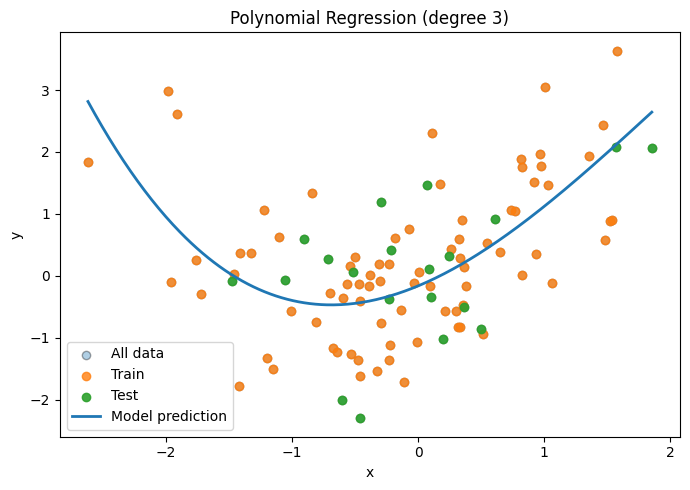

Polynomial Regression (degree 5)
  MSE: 0.8739 | MAE: 0.7441 | R²: 0.3051



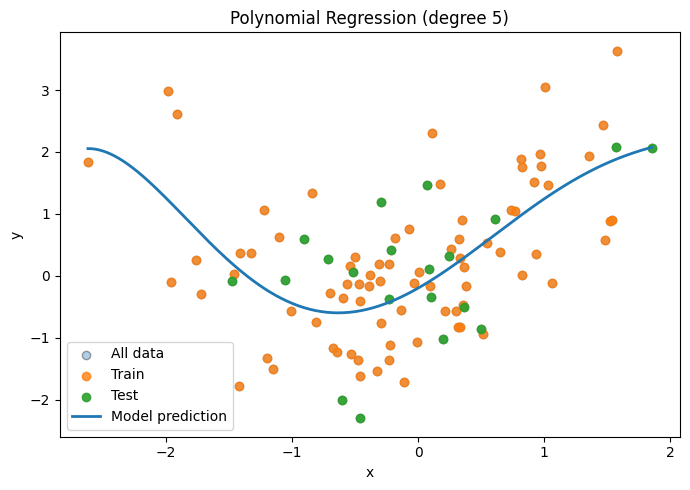

Polynomial Regression (degree 7)
  MSE: 1.9010 | MAE: 0.9452 | R²: -0.5117



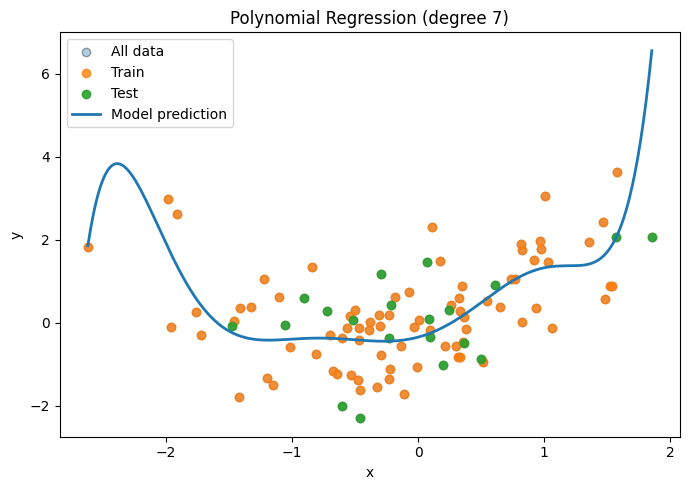

In [ ]:
# Scikit-learn expects 2D features: shape (n_samples, n_features)
X = x.reshape(-1, 1)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Smooth grid for plotting model curves
x_grid = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)

def evaluate_and_plot(model, title):
    # Fit on training data
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = model.predict(X_test)

    # Metrics on the TEST set
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2  = r2_score(y_test, y_pred_test)

    print(f"{title}")
    print(f"  MSE: {mse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}\n")

    # Plot data and model curve on smooth grid
    plt.figure(figsize=(7, 5))
    # Plot all raw data as light points
    plt.scatter(X[:, 0], y, alpha=0.35, edgecolors='k', label="All data")
    # Highlight train vs test for clarity
    plt.scatter(X_train[:, 0], y_train, alpha=0.8, label="Train")
    plt.scatter(X_test[:, 0], y_test,  alpha=0.9, label="Test")

    # Model curve on a smooth, sorted grid
    y_grid = model.predict(x_grid)
    plt.plot(x_grid[:, 0], y_grid, linewidth=2, label="Model prediction")

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.tight_layout()
    plt.show()
# Linear regression
linear_model = LinearRegression()
evaluate_and_plot(linear_model, "Linear Regression (degree 1 / no poly)")

#Polynomial Regression with Pipelines
degrees = [2, 3, 5, 7]
for d in degrees:
    poly_model = make_pipeline(
        PolynomialFeatures(degree=d, include_bias=False),
        LinearRegression()
    )
    evaluate_and_plot(poly_model, f"Polynomial Regression (degree {d})")


- **Reflection**: What do you observe about model fit and complexity? Please, elaborate.

## 2. Application to Real Data

Now, you will apply polynomial regression to a real-world dataset that relates the **compressive strength of high-performance concrete** to various input features such as **cement**, **water**, and **aggregate content**. This dataset originates from a study exploring predictive modeling of concrete strength using neural networks. You instead will start wit hpolynomial regression, a simple approach but that will let you investigate how well it can capture the potentially non-linear relationship between input features and compressive strength.

You can find the dataset here: https://github.com/UVADS/DS-4021/blob/388a5fd8aad496172aafc694163c799b0bd6f5dd/datasets/Concrete_Data.xls, in addition to its metadata: https://github.com/UVADS/DS-4021/blob/388a5fd8aad496172aafc694163c799b0bd6f5dd/datasets/Concrete_Readme.txt.

Reference:

- I-Cheng Yeh, *Modeling of strength of high performance concrete using artificial neural networks*, Cement and Concrete Research, Vol. 28, No. 12, pp. 1797–1808 (1998).

### a. Load the data and create a training and test set. The test set should contain at least 20% of the observations.

In [10]:
df = pd.read_excel('/content/Concrete_Data.xls')

# 2. Separate features (X) and target (y)
target_col = df.columns[-1]     # last column is compressive strength
X = df.drop(columns=[target_col])
y = df[target_col]

# 3. Train / Test split (20% test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### b. For each input variable in the dataset, create a **scatterplot** against the outcome variable (`Compressive_Strength`).

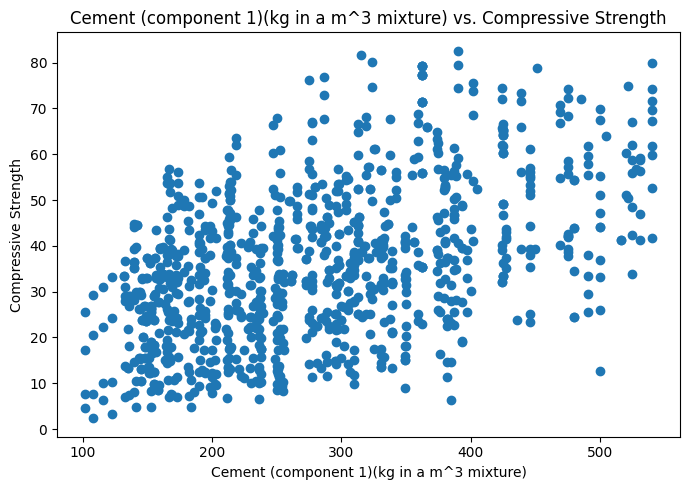

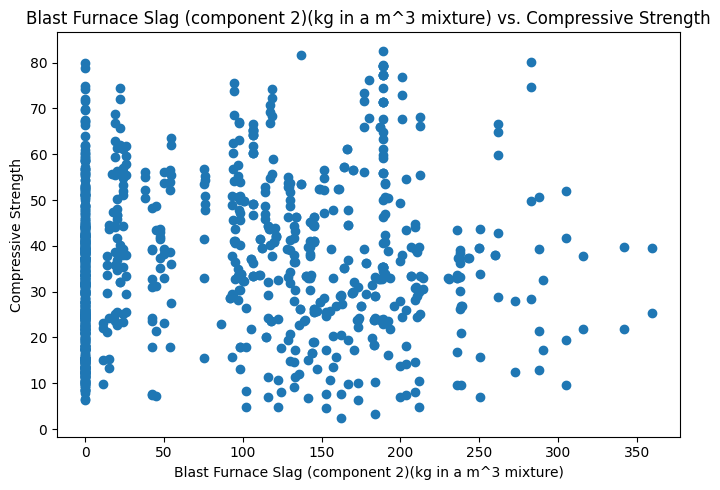

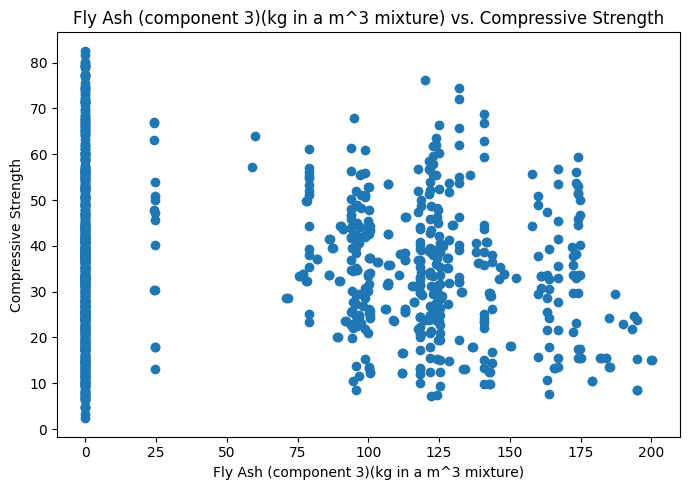

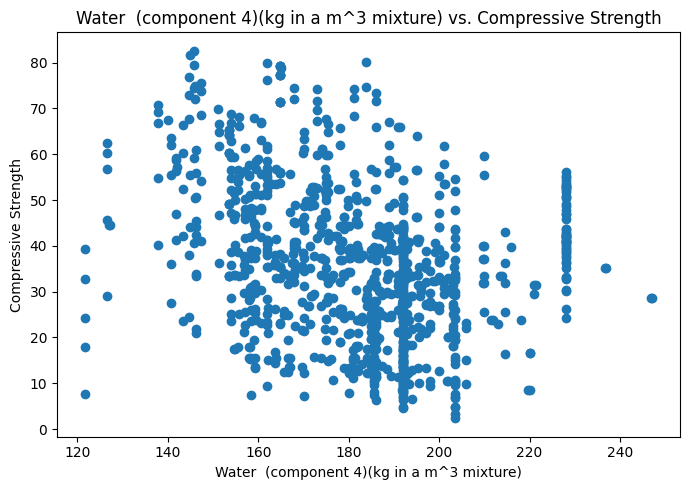

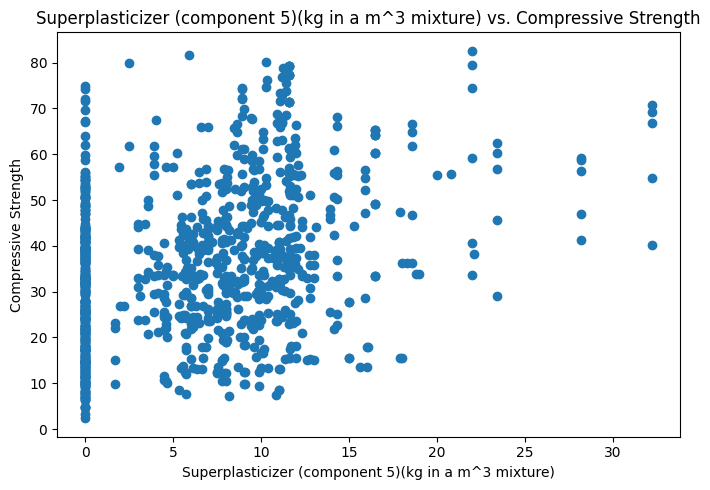

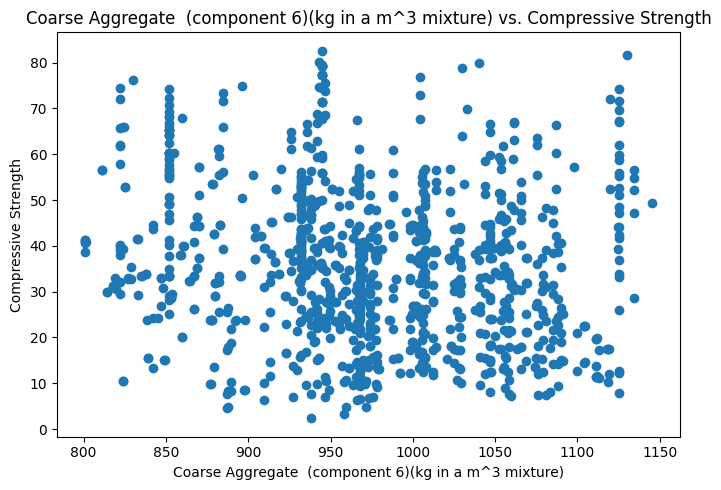

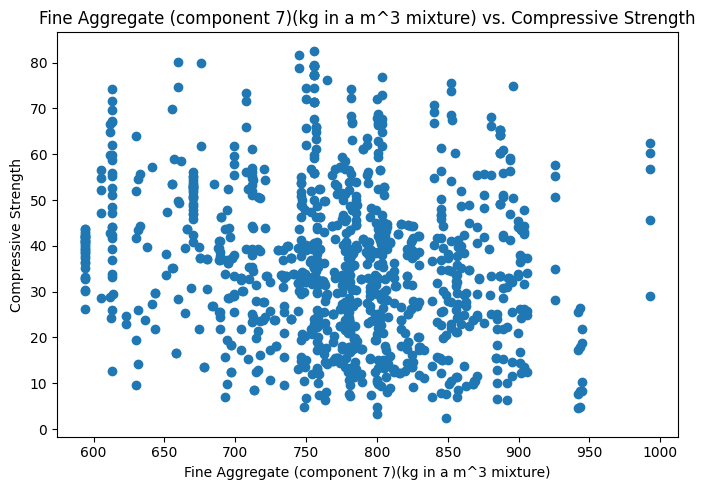

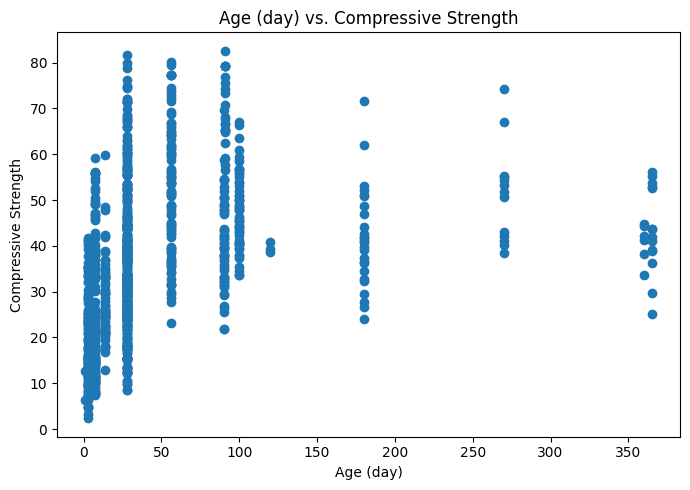

In [11]:
for i in range(len(X.columns)):
    plt.figure(figsize=(7, 5))
    plt.scatter(X.iloc[:, i], y)
    plt.title(f"{X.columns[i]} vs. Compressive Strength")
    plt.xlabel(X.columns[i])
    plt.ylabel("Compressive Strength")
    plt.tight_layout()
    plt.show()

### c. Reflect: Do any variables appear to have a non-linear relationship with the output?  Why might this suggest the need for polynomial regression? Please elaborate on your answers.

Several variables in the concrete dataset, including Age, Water, Cement, Superplasticizer, Fly Ash, Blast Furnace Slag, Fine Aggregate, and Coarse Aggregate, show evidence of non-linear relationships with compressive strength. For instance, strength increases rapidly with age before tapering off, while water and cement display curved trends that reflect diminishing or accelerating effects rather than straight-line patterns. Such curvature indicates that a simple linear model would systematically under- or over-predict in certain regions of the data. Polynomial regression addresses this by expanding features into higher-order terms and interactions, allowing the fitted function to bend and better capture these complex shapes. Therefore, the observed scatterplots suggest that polynomial regression could provide a more accurate model of the underlying relationships between material properties and concrete strength.

### d. You have probably become convinced that modeling non-linear relationships is necessary in this dataset.  To do this, you’ll be using `PolynomialFeatures` to expand the input features.

But before moving on to modelling, you will first inspect how the number of features grows as you increase the degree of the expansion.

- Apply `PolynomialFeatures` to your input variables using degrees 1 through 5.
- For each degree, print the number of resulting features.


In [12]:
# [Your code here]
degrees = [1,2,3,4,5]
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    print(f"Degree {d}: {X_poly.shape[1]} features")

Degree 1: 9 features
Degree 2: 45 features
Degree 3: 165 features
Degree 4: 495 features
Degree 5: 1287 features


### e. Discuss with your group and reflect:
    
- How does the number of features grow with increasing degree?
- What implications might this have for model training and interpretability?

Please elaborate on your answers.

1. The number of features produced by polynomial expansion grows combinatorially with the degree. Specifically, if n is the number of original predictors and d is the degree of the polynomial, then the total number of features is given by:
Number of features = (n+d)! / n!d!
This formula accounts for all higher-order powers of individual variables as well as all possible interaction terms. As the degree increases, the number of features grows very rapidly: for example, with n=9 predictors, the feature count rises from 9 at degree 1, to 45 at degree 2, to 165 at degree 3, and already exceeds 1000 by degree 5.
2. When the number of features grows combinatorially with polynomial degree, there are important implications for both model training and interpretability:
The large feature space increases the risk of overfitting, since the model can fit noise rather than true signal.Training becomes computationally expensive due to the high dimensionality and the need to estimate many coefficients.Multicollinearity between polynomial and interaction terms can make the model unstable, leading to large variance in coefficient estimates.To address this, techniques such as regularization (Ridge, Lasso) or limiting the polynomial degree are often necessary.
As the number of features grows, the model gets more and more difficult to interpret - that is, the intuitive link between predictors and the outcome is harder to explain, which reduces the usefulness of the model for decision-making.

### f. You will fit a LASSO regression model on the expanded features. But before jumping into the implementation, discuss and reflect on the following with your group:

- Why are we using LASSO instead of plain linear regression?
- What are the benefits of regularization in this context?
- What preprocessing steps are necessary for LASSO to work properly (e.g., scaling)?

Please elaborate on your answers.

1. We use LASSO regression instead of plain linear regression because polynomial feature expansion produces a very large number of predictors, many of which may be irrelevant or redundant. Plain linear regression would try to estimate coefficients for all these terms, leading to severe overfitting and unstable estimates due to multicollinearity. LASSO addresses this by adding an L1 penalty that shrinks less important coefficients exactly to zero, performing automatic feature selection while also regularizing the model. This makes the model more computationally stable, reduces variance, and improves interpretability by highlighting only the most relevant polynomial and interaction terms.

2. Regularization is especially valuable after polynomial feature expansion because the number of predictors grows rapidly and many of them are highly correlated. The main benefits are:
- Prevents overfitting: by penalizing large coefficients, regularization discourages the model from fitting noise in the training data, improving generalization to unseen data.
- Stabilizes estimation: in the presence of multicollinearity among polynomial and interaction terms, regularization reduces coefficient variance and produces more reliable estimates.
- Improves interpretability: with methods like LASSO, many coefficients are shrunk exactly to zero, effectively performing feature selection and leaving a smaller set of meaningful predictors.
- Enhances computational feasibility: controlling coefficient size makes the optimization problem better conditioned and less sensitive to small changes in the data.
In this context, regularization allows us to harness the flexibility of polynomial regression without being overwhelmed by the explosion of features and the risks of overfitting.

3. Before fitting a LASSO model, feature scaling is essential. This is because the L1 penalty in LASSO depends directly on the absolute size of coefficients, and if features are on different scales (e.g., “Age” in days vs. “Cement” in kg/m³), the penalty will unfairly shrink some coefficients more than others. Standardizing predictors (e.g., subtracting the mean and dividing by the standard deviation) ensures all features are on a comparable scale.
Other important preprocessing steps include:
- Handling missing values (LASSO cannot work with NaNs).
- Expanding features with PolynomialFeatures (to capture non-linearities) before applying LASSO.
- Splitting into train/test sets first to avoid data leakage during scaling.
- Using cross-validation to tune the regularization strength (a).
In short: scale the features, clean the data, then expand and regularize — this makes LASSO’s feature selection and shrinkage fair and effective.


### g. Now, implement both steps together. That is:

- Apply `PolynomialFeatures` to expand the input features.
- Fit a **Lasso regression model** using two different combinations of:
  - Polynomial `degree`
  - LASSO `alpha` value

Evaluate and compare the models using metrics such as **MSE**, **MAE**, or **R²** on a validation set.

Again, you should make use of pipelines for this.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def fit_eval_poly_lasso(degree, alpha):
    pipe = Pipeline([
        ('poly',   PolynomialFeatures(degree=degree, include_bias=False)),
        ('scale',  StandardScaler()),
        ('lasso',  Lasso(alpha=alpha, max_iter=10000, random_state=42))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    print(f"Degree={degree}, alpha={alpha}")
    print(f"  MSE: {mse:.3f} | MAE: {mae:.3f} | R²: {r2:.3f}\n")
    return {'degree': degree, 'alpha': alpha, 'mse': mse, 'mae': mae, 'r2': r2, 'model': pipe}

# Two example combinations (edit or add more as needed)
results = []
results.append(fit_eval_poly_lasso(degree=2, alpha=0.1))
results.append(fit_eval_poly_lasso(degree=3, alpha=0.01))


Degree=2, alpha=0.1
  MSE: 55.584 | MAE: 6.018 | R²: 0.784

Degree=3, alpha=0.01
  MSE: 38.050 | MAE: 4.754 | R²: 0.852



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+02, tolerance: 2.341e+01
  model = cd_fast.enet_coordinate_descent(


### h. Discuss and reflect with your group:
- How should we go about finding the best combination of degree and alpha?
- What methods could we use to explore this space systematically?
- Is there a data-driven approach for this?

Please elaborate on your answers

The best combination of polynomial degree and LASSO alpha should be chosen systematically rather than predefined. The alpha value is a regularization strength and is most effectively tuned using cross-validation, where multiple alpha values are tested and the one that minimizes prediction error on validation folds is selected. The degree controls how complex the polynomial expansion is; higher degrees introduce more flexibility but also more features and a greater risk of overfitting. The best degree is typically found by comparing models across a small grid of candidate degrees (e.g., 1–3) using cross-validation to ensure the chosen degree generalizes well. In practice, a grid search over both parameters within a pipeline is often used, balancing model accuracy with computational cost and interpretability.

To explore the space of polynomial degree and LASSO alpha systematically, we can use hyperparameter search methods within a cross-validation framework. The most common are:
Grid Search: define a grid of candidate values for both degree (e.g., 1–3) and alpha (e.g., a log-spaced range such as 0.001–10), and evaluate every combination using cross-validation. This is exhaustive and easy to interpret but can be computationally expensive.
Random Search: sample random combinations of degree and alpha from specified ranges. This is more efficient when the search space is large and often finds good solutions with fewer evaluations.
Automated methods like LassoCV (for alpha) or ElasticNetCV, which internally use cross-validation to select the optimal regularization strength.
Nested Cross-Validation: ensures that the process of selecting degree and alpha is itself validated, reducing the risk of overfitting to a particular split.



### i. Now, expand your model evaluation to include 5 polynomial degrees (1 through 5) and 10 different alpha values for Lasso, spaced logarithmically (e.g., using `np.logspace`)

Now, do the following:

- For each combination of degree and alpha, compute the cross-validated error (e.g., MSE).
- Store the results and generate a plot that summarizes model performance.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+04, tolerance: 2.341e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+04, tolerance: 2.182e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+04, tolerance: 2.287e

Best CV MSE = 32.0619  at degree=4, alpha=0.001


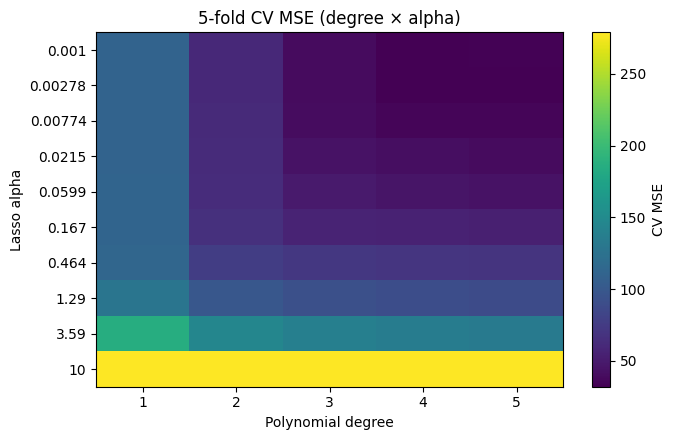

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# grids
degrees = [1, 2, 3, 4, 5]
alphas  = np.logspace(-3, 1, 10)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# run CV and store MSE in a 2D array: rows=alphas, cols=degrees
mse = np.zeros((len(alphas), len(degrees)))

for j, d in enumerate(degrees):
    for i, a in enumerate(alphas):
        pipe = Pipeline([
            ('poly', PolynomialFeatures(degree=d, include_bias=False)),
            ('scale', StandardScaler()),
            ('lasso', Lasso(alpha=a, max_iter=10000, random_state=42)),
        ])
        scores = cross_val_score(pipe, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse[i, j] = -scores.mean()

# best combo
i_best, j_best = np.unravel_index(np.argmin(mse), mse.shape)
print(f"Best CV MSE = {mse[i_best, j_best]:.4f}  at degree={degrees[j_best]}, alpha={alphas[i_best]:.5g}")

# heatmap
plt.figure(figsize=(7, 4.5))
im = plt.imshow(mse, aspect='auto', origin='upper')  # default colormap
plt.colorbar(im, label='CV MSE')
plt.xticks(range(len(degrees)), degrees)
plt.yticks(range(len(alphas)), [f"{a:.3g}" for a in alphas])
plt.xlabel('Polynomial degree')
plt.ylabel('Lasso alpha')
plt.title('5-fold CV MSE (degree × alpha)')
plt.tight_layout()
plt.show()


### j. Discuss and reflect with your group:

- Why did you choose this type of plot to summarize results?
- Can you think of a better or more informative visualization?

Please elaborate on your answers

1. We used a heatmap to plot the results because it provides a clear visual summary of how model performance varies across the two hyperparameters, polynomial degree and LASSO alpha. Since degree takes on discrete values (1–5) and alpha is tested over a range of logarithmically spaced values, the heatmap allows us to lay these out in a grid and color-code the performance (e.g., CV MSE). This makes it much easier to spot trends — such as which degrees consistently perform better, or the range of alpha values that minimize error — compared to reading raw tables of numbers. In short, the heatmap is an effective way to interpret a two-dimensional hyperparameter search, helping us quickly identify the regions of best performance
2.
- Line plots (validation curves):
Put alpha (log scale) on the x-axis.
Plot the average CV MSE on the y-axis.
Draw one line for each polynomial degree (1–5).
This makes it very easy to see how performance changes as alpha increases and how different degrees compare.
-  Bar chart of best models:
For each degree, show a bar with the lowest CV MSE across all alpha values.
Quick summary of which degree gives the best performance overall.
Both are easier to read than a heatmap, but still show the key story: how performance depends on alpha and degree.

### k. Using the most optimal model (based on your previous cross-validation results), generate predictions on the test set. In addition, create a plot comparing the predicted values against the observed values.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.851e+03, tolerance: 2.341e+01
  model = cd_fast.enet_coordinate_descent(


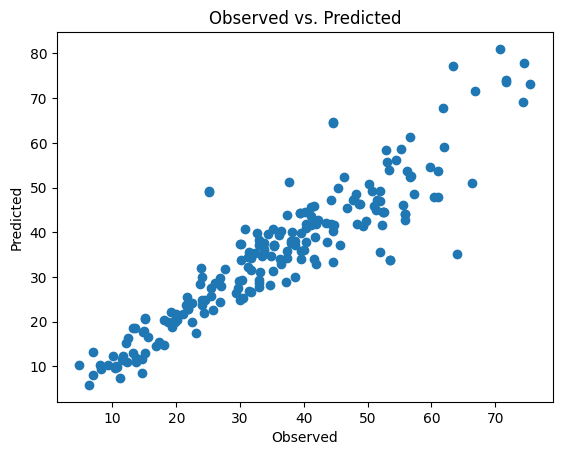

In [23]:
#Best CV MSE = 32.0619  at degree=4, alpha=0.001
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=4, include_bias=False)),
    ('scale', StandardScaler()),
    ('lasso', Lasso(alpha=0.001, max_iter=10000, random_state=42)),
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title("Observed vs. Predicted")
plt.show()

### h. Identify the most important features from the LASSO model.

                                               feature  coefficient   abs_coef
493                                        Age (day)^4   -66.902012  66.902012
492  Fine Aggregate (component 7)(kg in a m^3 mixtu...    41.160341  41.160341
488  Coarse Aggregate  (component 6)(kg in a m^3 mi...    36.523933  36.523933
2           Fly Ash (component 3)(kg in a m^3 mixture)   -30.746336  30.746336
163                                        Age (day)^3    29.843167  29.843167
282  Cement (component 1)(kg in a m^3 mixture) Fine...   -29.644775  29.644775
283  Cement (component 1)(kg in a m^3 mixture) Age ...    27.167662  27.167662
478  Superplasticizer (component 5)(kg in a m^3 mix...    24.923134  24.923134
176  Cement (component 1)(kg in a m^3 mixture)^2 Bl...   -23.453579  23.453579
3            Water  (component 4)(kg in a m^3 mixture)    23.362497  23.362497


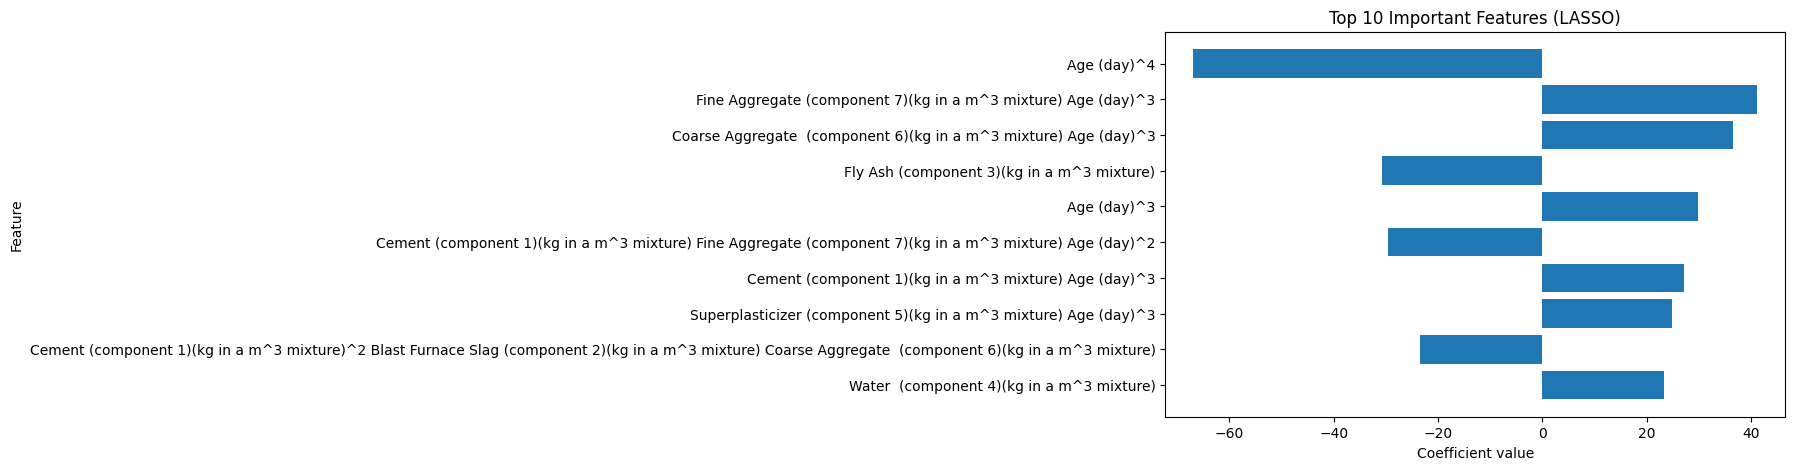

In [26]:
# Get feature names for the polynomial expansion
feature_names = pipe.named_steps['poly'].get_feature_names_out(input_features=X.columns)

# Get LASSO coefficients
lasso_coefs = pipe.named_steps['lasso'].coef_

# Put into a DataFrame for readability
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': lasso_coefs
})

# Sort by absolute importance
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

print(coef_df.head(10))  # top 10 important features

# Optional: plot
plt.figure(figsize=(8,5))
plt.barh(coef_df['feature'][:10], coef_df['coefficient'][:10])
plt.xlabel("Coefficient value")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (LASSO)")
plt.gca().invert_yaxis()
plt.show()


Reflect:
- Do the important features make intuitive sense?
- Are any of them polynomial interaction terms? What might that tell you?

Please, elaborate on your answers.

YOUR TEXT HERE

## 3. Collaboration Reflection (5 points)

As a group, briefly reflect on the following (max 1–2 short paragraphs):

- How did the group dynamics work throughout the assignment?
- Were there any major disagreements or diverging approaches?
- How did you resolve conflicts or make final modeling decisions?
- What did you learn from each other during this project?

YOUR TEXT HERE